In [208]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from sklearn import datasets
import statsmodels.api as sm
from statsmodels import stats as sms

from matplotlib import pyplot as plt
import seaborn as sns



In [209]:
data = pd.read_csv('ds_salaries.csv', sep=',')
data.head(3)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


Удаляем лишние признаки:

In [210]:
data = data.drop(['salary', 'salary_currency', 'employee_residence'], axis=1)

In [211]:
# Зададим уровень значитмости a
alpha = 0.05 
print(f'Уровень значимости alpha = {alpha}')

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [212]:
# Проверяю на наличие пропусков и типов.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        607 non-null    int64 
 1   work_year         607 non-null    int64 
 2   experience_level  607 non-null    object
 3   employment_type   607 non-null    object
 4   job_title         607 non-null    object
 5   salary_in_usd     607 non-null    int64 
 6   remote_ratio      607 non-null    int64 
 7   company_location  607 non-null    object
 8   company_size      607 non-null    object
dtypes: int64(4), object(5)
memory usage: 42.8+ KB


В датасете 607 записей (без пропущенных значений).

Проверим данные на наличие полных дубликатов:

In [213]:
mask = data.duplicated()
duplicates = data[mask]
print(f'Число найденных дубликатов: {duplicates.shape[0]}')

Число найденных дубликатов: 0


Создаю фильтр по профессии:

In [214]:
Data_Scientist = data[data['job_title'] == 'Data Scientist']

### Общее распределение зарплаты

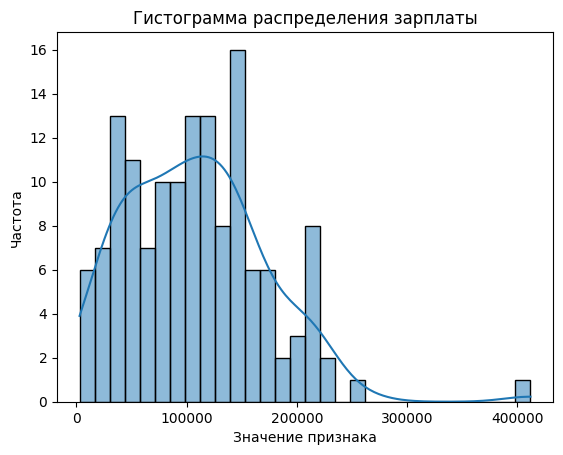

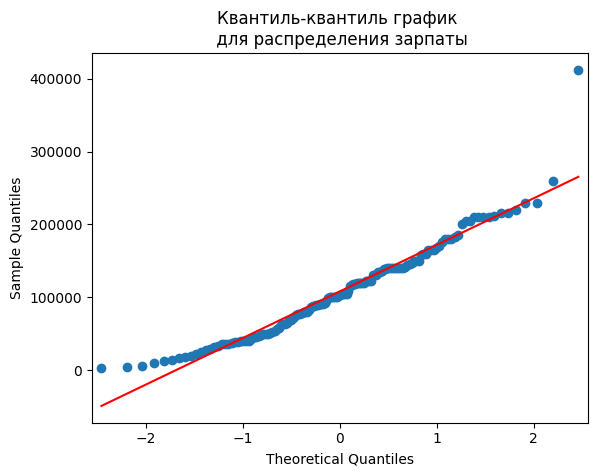

In [215]:
# задаём параметры гистограммы
ax = sns.histplot(Data_Scientist["salary_in_usd"], bins=30, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Гистограмма распределения зарплаты')
sm.qqplot(Data_Scientist["salary_in_usd"], line='s')
plt.title('Квантиль-квантиль график \n для распределения зарпаты')
plt.show()


In [216]:
# Просмотр статистических данных
data_agg = Data_Scientist["salary_in_usd"].describe().round(2).to_frame()
data_agg.columns = ['Размер зарплаты']
data_agg

,Размер зарплаты
count,143.00
mean,108187.83
std,64112.84
min,2859.00
25%,54724.00
50%,103691.00
75%,140850.00
max,412000.00


Распределение зарплаты отлично от нормального, имеются выбросы.

### Распределение зарплаты Data Scientist в зависимости от года

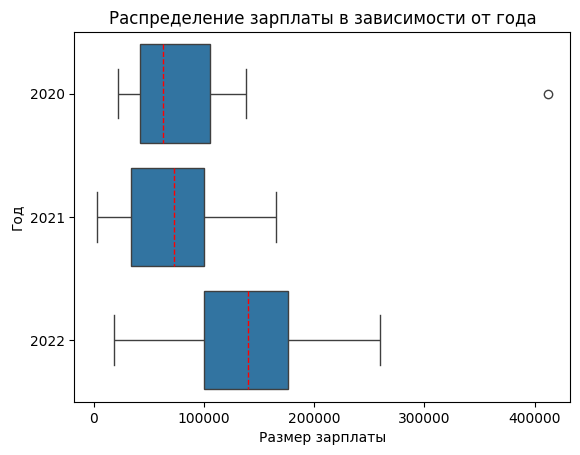

In [217]:
ax = sns.boxplot(Data_Scientist, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплаты', ylabel='Год')
plt.title('Распределение зарплаты в зависимости от года')
plt.show()

In [218]:
# Просмотр статистических данных
data_agg = Data_Scientist.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Зарплата в зависимости от года')
data_agg

Зарплата в зависимости от года


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,85970.52,81436.65,21669.0,42197.0,62726.0,105000.0,412000.0
2021,45.0,70671.73,45422.97,2859.0,33808.0,73000.0,100000.0,165000.0
2022,77.0,136172.09,54563.08,18442.0,100000.0,140000.0,176000.0,260000.0


На первый взгляд ежегодный рост зарплаты происходит не каждый год.В 2021 году средняя зарплата даже меньше, чем в 2020 году. Количество соискателей с каждым годом росло. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

### Соотношение зарплаты Data Scientist и Data Engineer в 2022 году

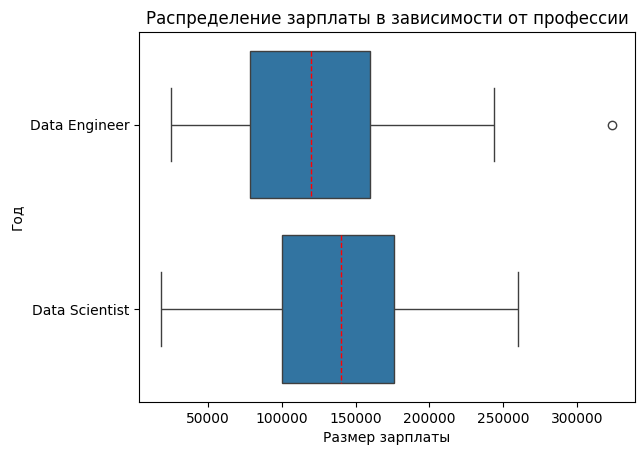

In [219]:
year_2022=data[(data['work_year'] == 2022) & ((data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer'))]

ax = sns.boxplot(year_2022, x='salary_in_usd', y='job_title', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплаты', ylabel='Год')
plt.title('Распределение зарплаты в зависимости от профессии')
plt.show()


In [220]:
# Просмотр статистических данных
data_agg = year_2022.groupby('job_title')['salary_in_usd'].describe().round(2)
print('Зарплата в зависимости от профессии')
data_agg

Зарплата в зависимости от профессии


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,89.0,126375.70,55954.40,25000.0,78526.0,120000.0,160000.0,324000.0
Data Scientist,77.0,136172.09,54563.08,18442.0,100000.0,140000.0,176000.0,260000.0


Распределения зарплат различны в зависимости от профессии.Зарплата Data Scientist в среднем немного выше. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

### Соотношение зарплаты специалистов Data Scientist в компаниях различных размеров

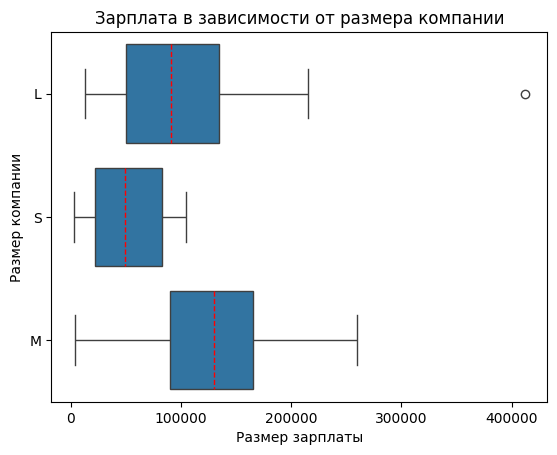

In [221]:
ax = sns.boxplot(Data_Scientist, x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплаты', ylabel='Размер компании')
plt.title('Зарплата в зависимости от размера компании')
plt.show()

In [222]:
# Просмотр статистических данных
data_agg = Data_Scientist.groupby('company_size')['salary_in_usd'].describe().round(2)
print('Зарплата в зависимости от размера компании')
data_agg

Зарплата в зависимости от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,45.0,103313.36,71815.18,13400.0,50000.0,90734.0,135000.0,412000.0
M,77.0,126380.75,56389.53,4000.0,90000.0,130000.0,165000.0,260000.0
S,21.0,51925.76,33216.29,2859.0,21669.0,49268.0,82500.0,105000.0


Зарплата в зависимости от размера компании различна. Наименьшая зарплата в небольших компаниях.А вот в средних компаниях сотрудники получают наиболее высокую зарплату.Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

 ### Связь между наличием должностей Data Scientist и Data Engineer и размером компании

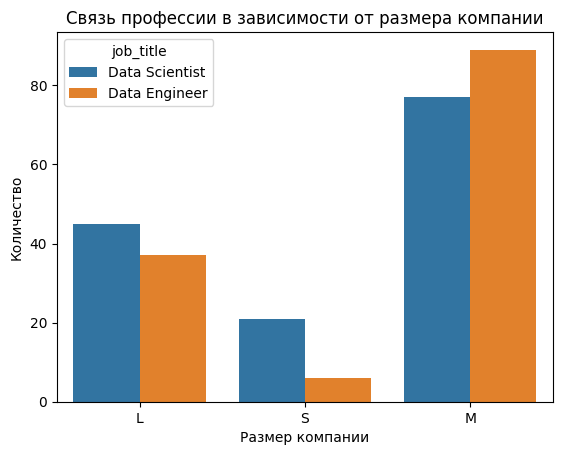

In [223]:
job=data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]

ax = sns.countplot(data=job, x=data['company_size'], hue='job_title')
ax.set(xlabel='Размер компании', ylabel='Количество')
plt.title('Связь профессии в зависимости от размера компании')
plt.show()

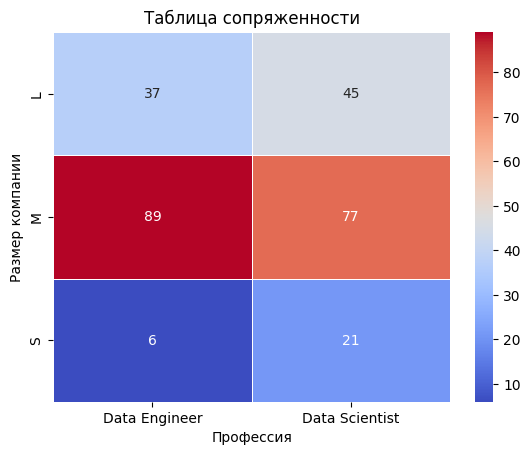

In [224]:
cross_tab = pd.crosstab(index=job['company_size'], columns=job['job_title'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Профессия', ylabel='Размер компании')
plt.title('Таблица сопряженности')
plt.show()

В небольшой компании наблюдается весомый разрыв между количеством соискателей Data Scientist и Data Engineer.Причём Data Engineer в несколько раз меньше. А вот в средних компаниях количество Data Engineer выше чем Data Scientist.Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

## Статистический анализ данных

In [225]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер зарплаты за прошлый год($μ_1$) статистически меньше либо равен размеру зарплаты следующего года($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер за прошлый год ($μ_1$) статистически больше, чем размер зарплаты следующего года($μ_2$).

$$ H_1 : μ_1 > μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [226]:
# проводим тест Шапиро-Уилка
print('Распределение зарплат у специалистов Data Scientist:')
result = stats.shapiro(Data_Scientist[['salary_in_usd']])
decision_normality(result[1])

Распределение зарплат у специалистов Data Scientist:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


In [227]:
# узнаю за какое время данные распределены
Data_Scientist['work_year'].unique()

array([2020, 2021, 2022], dtype=int64)

**Выберем подходящий статистический тест**
* Буду сравнивать зарплату Data Scientist за 2020 и 2021 годы, а также 2021 и 2022 годы.Таким образом отвечу на вопрос.
Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:

* Какой тип у признака «Зарплата в долларах США»? — Количественный.
* Сколько сравниваемых групп? — две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна — Уитни для сравнения распределений на основе рангов.



In [228]:
# Фильтрую по году, в котором была выплачена зарплата.
year_2020 = Data_Scientist[Data_Scientist['work_year'] == 2020]
year_2021 = Data_Scientist[Data_Scientist['work_year'] == 2021]
year_2022 = Data_Scientist[Data_Scientist['work_year'] == 2022]

**Проведём тест**

In [229]:
# проводим тест
print('Сравнение зарплаты 2020 и 2021 года')
_, p = stats.mannwhitneyu(year_2020['salary_in_usd'], year_2021['salary_in_usd'], alternative='greater')
decision_hypothesis(p)

print('Сравнение зарплаты 2021 и 2022 года')
_, p = stats.mannwhitneyu(year_2021['salary_in_usd'], year_2022['salary_in_usd'], alternative='greater')
decision_hypothesis(p)

Сравнение зарплаты 2020 и 2021 года
p-value = 0.320
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
Сравнение зарплаты 2021 и 2022 года
p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод: Зарплата с каждым годом становится выше, либо не меняется. Нет оснований говорить, что зарплата становится меньше.**

### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер зарплаты Data Scientist ($μ_1$) статистически больше либо равен размеру зарплаты Data Engineer ($μ_2$).

$$ H_0 : μ_1 >= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер зарплаты Data Scientist ($μ_1$) статистически меньше, чем размер зарплат Data Engineer ($μ_2$).
$$ H_1 : μ_1 < μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [230]:
# Фильтр по году и профессии
Data_Engineer = data[(data['job_title'] == 'Data Engineer') & (data['work_year'] == 2022)]
Data_Scientist = data[(data['job_title'] == 'Data Scientist') & (data['work_year'] == 2022)]
# проводим тест Шапиро-Уилка
print('Распределение зарплат у специалистов Data Engineer:')
result = stats.shapiro(Data_Engineer[['salary_in_usd']])
decision_normality(result[1])
print('Распределение зарплат у специалистов Data Scientist:')
result = stats.shapiro(Data_Scientist[['salary_in_usd']])
decision_normality(result[1])

Распределение зарплат у специалистов Data Engineer:
p-value = 0.010
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Распределение зарплат у специалистов Data Scientist:
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**
Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:

* Какой тип у признака «Зарплата в долларах США»? — Количественный.
* Сколько сравниваемых групп? — две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна — Уитни для сравнения распределений на основе рангов.

In [231]:
# проводим тест
_, p = stats.mannwhitneyu(Data_Scientist['salary_in_usd'], Data_Engineer['salary_in_usd'], alternative='less')
decision_hypothesis(p)

p-value = 0.923
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:
Зарплата у Data Scientist выше или равна зарплате Data Engineer.**

### Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: зарплаты специалистов Data Scientist не отличаются в разных компаниях: S — (небольшая компания) ($μ_1$), M — (средняя компания) ($μ_2$), L — (крупная компания) ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3 $$

*Альтернативная гипотеза*: зарплаты специалистов Data Scientist отличаются в зависимости от компании: S — (небольшая компания) ($μ_1$), M — (средняя компания) ($μ_2$), L — (крупная компания) ($μ_3$).





**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [232]:
# Фильтр по профессии
Data_Scientist = data[data['job_title'] == 'Data Scientist']
# Фильтр по размеру компании
Data_Scientist_S = Data_Scientist[Data_Scientist['company_size'] == 'S']
Data_Scientist_M = Data_Scientist[Data_Scientist['company_size'] == 'M']
Data_Scientist_L = Data_Scientist[Data_Scientist['company_size'] == 'L']
# проводим тест Шапиро-Уилка
print('Распределение зарплат у специалистов в компании S:')
result = stats.shapiro(Data_Scientist_S[['salary_in_usd']])
decision_normality(result[1])
print('Распределение зарплат у специалистов в компании M:')
result = stats.shapiro(Data_Scientist_M [['salary_in_usd']])
decision_normality(result[1])
print('Распределение зарплат у специалистов в компании L:')
result = stats.shapiro(Data_Scientist_L [['salary_in_usd']])
decision_normality(result[1])

Распределение зарплат у специалистов в компании S:
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Распределение зарплат у специалистов в компании M:
p-value = 0.639
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Распределение зарплат у специалистов в компании L:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Регион проживания в США»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [233]:
# проводим тест
_, p = stats.kruskal(Data_Scientist_S['salary_in_usd'], Data_Scientist_M['salary_in_usd'], Data_Scientist_L['salary_in_usd'])
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:
зарплаты специалистов Data Scientist отличаются в зависимости от размера компании**

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

*Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между наличием должностей Data Scientist и Data Engineer и размером компании нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между наличием должностей Data Scientist и Data Engineer и размером компании есть взаимосвязь (признаки зависимы).

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «company_size»? — Категориальный.
* Сколько сравниваемых групп? — Три.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [234]:
# Фильтр по профессии
job=data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]
# составляем таблицу сопряжённости
cross_table = pd.crosstab(job['company_size'], job['job_title'])

cross_table

job_title,Data Engineer,Data Scientist
company_size,,
L,37,45
M,89,77
S,6,21


In [235]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.008
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:
между наличием должностей Data Scientist и Data Engineer и размером компании есть взаимосвязь (признаки зависимы)**

## Дополнительные исследования

### Наблюдается ли рост зарплат в зависимости от опыта работы Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер зарплаты специалиста на позиции младше ($μ_1$) статистически меньше либо равен размеру зарплаты специалиста на одну позицию выше($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер зарплаты специалиста на позиции младше($μ_1$) статистически больше, чем размер зарплаты специалиста на одну позицию выше($μ_2$).

$$ H_1 : μ_1 > μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [236]:
# проводим тест Шапиро-Уилка
print('Распределение зарплат у специалистов Data Scientist:')
result = stats.shapiro(Data_Scientist[['salary_in_usd']])
decision_normality(result[1])

Распределение зарплат у специалистов Data Scientist:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Визуальный анализ данных**

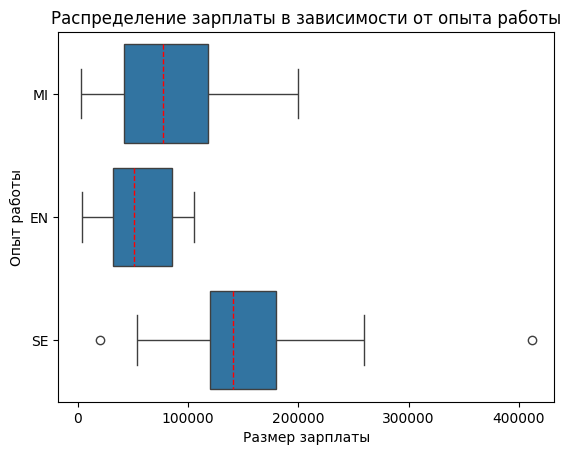

In [237]:
ax = sns.boxplot(Data_Scientist, x='salary_in_usd', y='experience_level', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплаты', ylabel='Опыт работы')
plt.title('Распределение зарплаты в зависимости от опыта работы')
plt.show()

**Выберем подходящий статистический тест**
* Буду сравнивать зарплату Data Scientist на позициях     
1.EN — Entry-level/Junior и MI - Mid-level/Intermediate       
2.MI — Mid-level/Intermediate и 2SE - Senior-level/Expert      
3.SE — Senior-level/Expert и EX - Executive-level/Director.    
Таким образом отвечу на вопрос.
Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:

* Какой тип у признака «Зарплата в долларах США»? — Количественный.
* Сколько сравниваемых групп? — две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна — Уитни для сравнения распределений на основе рангов.

In [238]:
#Отфилтрую по соответствующим позициям
entry_level = Data_Scientist[Data_Scientist['experience_level'] == 'EN']
mid_level = Data_Scientist[Data_Scientist['experience_level'] == 'MI']
senior_level = Data_Scientist[Data_Scientist['experience_level'] == 'SE']
executive_level = Data_Scientist[Data_Scientist['experience_level'] == 'EX']

# Узнаю сколько специалистов на определённой позиции работает.
print(f'Количество специалистов на позиции Entry-level/Junior: {entry_level.shape[0]}')
print(f'Количество специалистов на позиции Mid-level/Intermediate: {mid_level.shape[0]}')
print(f'Количество специалистов на позиции Senior-level/Expert: {senior_level.shape[0]}')
print(f'Количество специалистов на позиции Executive-level/Director: {executive_level.shape[0]}')

Количество специалистов на позиции Entry-level/Junior: 22
Количество специалистов на позиции Mid-level/Intermediate: 60
Количество специалистов на позиции Senior-level/Expert: 61
Количество специалистов на позиции Executive-level/Director: 0


Специалисты Executive-level/Director в выборке отсутствуют. Не берём для теста в расчёт.

**Проведём тест**

In [239]:
# проводим тест
print('Сравнение зарплаты Entry-level/Junior и Mid-level/Intermediate')
_, p = stats.mannwhitneyu(entry_level['salary_in_usd'], mid_level['salary_in_usd'], alternative='greater')
decision_hypothesis(p)

print('Сравнение зарплаты Mid-level/Intermediate и Senior-level/Expert')
_, p = stats.mannwhitneyu(mid_level['salary_in_usd'], senior_level['salary_in_usd'], alternative='greater')
decision_hypothesis(p)



Сравнение зарплаты Entry-level/Junior и Mid-level/Intermediate
p-value = 0.988
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
Сравнение зарплаты Mid-level/Intermediate и Senior-level/Expert
p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод: Чем выше позиция специалиста, тем выше его зарплата.**

### Есть ли связь между опытом работы на должности в течение года и типом трудоустройства?

*Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между наличием опыта работы на должности в течение года и типом трудоустройства нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между наличием опыта работы на должности в течение года и типом трудоустройства есть взаимосвязь (признаки зависимы).

**Визуальный анализ данных**

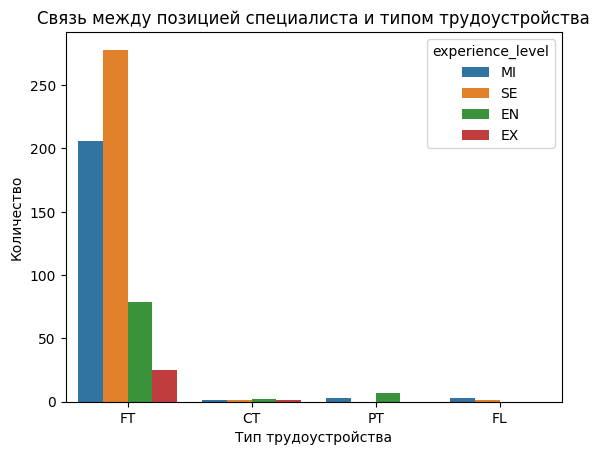

In [240]:
ax = sns.countplot(data=data, x=data['employment_type'], hue='experience_level')
ax.set(xlabel='Тип трудоустройства', ylabel='Количество')
plt.title('Связь между позицией специалиста и типом трудоустройства')
plt.show()

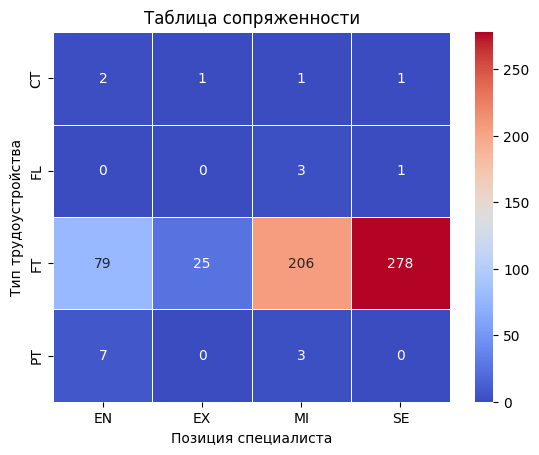

In [241]:
cross_tab = pd.crosstab(index=data['employment_type'], columns=data['experience_level'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Позиция специалиста', ylabel='Тип трудоустройства')
plt.title('Таблица сопряженности')
plt.show()

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «employment_type»? — Категориальный.
* Сколько сравниваемых групп? — Четыре.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [242]:
# составляем таблицу сопряжённости
cross_table = pd.crosstab(data['experience_level'], data['employment_type'])

cross_table

employment_type,CT,FL,FT,PT
experience_level,,,,
EN,2,0,79,7
EX,1,0,25,0
MI,1,3,206,3
SE,1,1,278,0


In [243]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод: связь между опытом работы и тип трудоустройства присутствует**

## Финальный вывод по исследованию

1.Зарплата с каждым годом становится выше, либо не меняется. Нет оснований говорить, что зарплата становится меньше;
2.Зарплата у Data Scientist выше или равна зарплате Data Engineer;              
3.Зарплаты специалистов Data Scientist отличаются в зависимости от размера компании;  
4.Количество специалистов Data Scientist и Data Engineer зависит от размера компании (признаки зависимы);  
5.Чем выше позиция специалиста, тем выше его зарплата;  
6.Связь между опытом работы и типом трудоустройства присутствует 